In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import random
from auxPlots import selectColor, xSecTest
from aux import getInfo, getLHEevents, getDistributions


pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams['figure.max_open_warning'] = 50
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [2]:
#Reading files
files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/UV_BSM/*/run_exp/*.npz')) + list(
    glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/TopEFT/*/run_exp/*.npz'))
sm_files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/sm/pp2ttbar_gs4/*.npz'))
data = []
data_sm = []
#Loading the distributions
for f in files + sm_files:
    aux = np.load(f, allow_pickle = True)
    if aux['model'] == 'SM':
        data_sm.append(aux)
    else:
        data.append(aux)


data = sorted(data, key=lambda d: d['mass_params'][0])

In [3]:
print(data[0]['mass_params'])
xSecTest(data + data_sm , True)

[500. 475.]
1-loop VLF $g g \to t \bar{t}$  mPsiT: 500.0, mSDM: 475.0 Result: Passed
xsec = 0.098330000 sum of weights = 0.098330000 
1-loop VLF $q q \to t \bar{t}$  mPsiT: 500.0, mSDM: 475.0 Result: Passed
xsec = 0.081790000 sum of weights = 0.081790000 
VLF EFT $g g \to t \bar{t}$  mPsiT: 500.0, mSDM: 475.0 Result: Passed
xsec = 0.073389901 sum of weights = 0.073389901 
VLF EFT $q q \to t \bar{t}$  mPsiT: 500.0, mSDM: 475.0 Result: Passed
xsec = 0.065338471 sum of weights = 0.065338471 
1-loop VLF $g g \to t \bar{t}$  mPsiT: 1500.0, mSDM: 1425.0 Result: Passed
xsec = 0.008313000 sum of weights = 0.008313000 
1-loop VLF $q q \to t \bar{t}$  mPsiT: 1500.0, mSDM: 1425.0 Result: Passed
xsec = 0.007573000 sum of weights = 0.007573000 
VLF EFT $g g \to t \bar{t}$  mPsiT: 1500.0, mSDM: 1425.0 Result: Passed
xsec = 0.008215691 sum of weights = 0.008215691 
VLF EFT $q q \to t \bar{t}$  mPsiT: 1500.0, mSDM: 1425.0 Result: Passed
xsec = 0.007197909 sum of weights = 0.007197909 
SM $p p \to t \b

In [4]:
 for d in data:
    print(d['mass_params'][0], d['model'], d['process'], d['nevents'])

500.0 1-loop VLF $g g \to t \bar{t}$ 822950
500.0 1-loop VLF $q q \to t \bar{t}$ 866698
500.0 VLF EFT $g g \to t \bar{t}$ 500000
500.0 VLF EFT $q q \to t \bar{t}$ 200000
1500.0 1-loop VLF $g g \to t \bar{t}$ 450535
1500.0 1-loop VLF $q q \to t \bar{t}$ 712420
1500.0 VLF EFT $g g \to t \bar{t}$ 300000
1500.0 VLF EFT $q q \to t \bar{t}$ 200000


In [5]:
print(np.arange(400.,1550.,35.))
#627.5, 977.5, 1257.5
print((627.5 / 977.5)**(-1), (977.5 / 1257.5)**(-1), (627.5 / 1257.5)**(-1) )

[ 400.  435.  470.  505.  540.  575.  610.  645.  680.  715.  750.  785.
  820.  855.  890.  925.  960.  995. 1030. 1065. 1100. 1135. 1170. 1205.
 1240. 1275. 1310. 1345. 1380. 1415. 1450. 1485. 1520.]
1.557768924302789 1.2864450127877236 2.00398406374502


# Invariant mass $qq\to t\bar{t}$

/tmp/ipykernel_5418/545211966.py:71: RuntimeWarning: invalid value encountered in divide
  yErr = abs(y)*np.sqrt((np.array(histsErr_sm[0])/np.array(hists_sm[0]))**2 + sum(np.power(histsErr_sm[0],2))/(sum(hists_sm[0])**2))


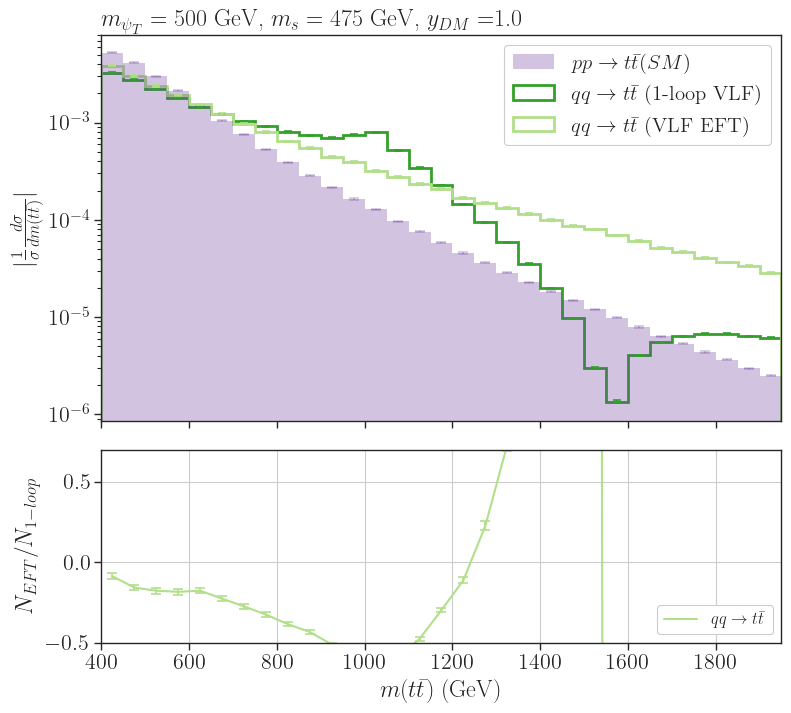

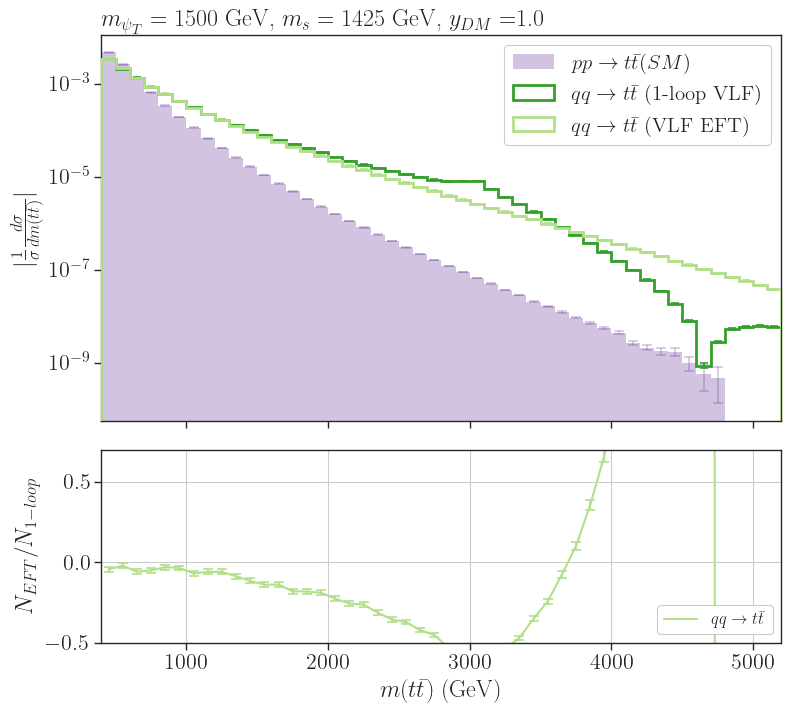

In [19]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = True


#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']

    #Couping
    yDM = selected[0]['ydm']
    
    #Defining the binning according to the BSM masses
    if mPsiT < 800.0:
        #bins = np.arange(400.,1550.,35.)
        bins = np.arange(400.,2000.,50.)
    elif mPsiT <= 1250:
        bins = np.arange(400.,2000.,50.)
    elif mPsiT <=2000:
        bins = np.arange(400.,5300.,100.)    
    elif mPsiT <=3000:
        bins = np.arange(400.,3300.,50.)
    elif mPsiT <= 7000:
        bins = np.arange(1000.,4300.,100.)
    else:
        bins = np.arange(1000.,5300.,100.)
   
    #SM plot arrays
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []

    #Selecting the SM data
    selected_sm = data_sm

    #Loop over qq and gg to generate pp
    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
        #Plotting the SM hist
        aux = axarr[0].hist(bins[:-1],weights=np.abs(h),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
                              color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                             linewidth=0,fill=True,stacked=True,linestyle='solid')
    
        #hists_sm.append(sum(hists_sm))
        #histsErr_sm.append(np.sqrt(histsErr_sm[0]**2 + histsErr_sm[1]**2))
        #Plotting the SM error
        x = (bins[:-1]+bins[1:])/2.0
        y = aux[0]
        #We have to propagate the error because we are using density = True
        yErr = abs(y)*np.sqrt((np.array(histsErr_sm[0])/np.array(hists_sm[0]))**2 + sum(np.power(histsErr_sm[0],2))/(sum(hists_sm[0])**2))  
        #Plot
        axarr[0].errorbar(x,y, yerr = yErr,
                       color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                          ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
    
    #BSM plot arrays
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    c = []

    #Loop over the processes
    for j,d in enumerate(selected):
        if r'$g g \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                              color=c[j],alpha=1.0,histtype='step', density = True,
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
    #axarr[0].set_ylabel(r'$\frac{d \sigma}{d m(t\bar{t})}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    

    #Ratio plot
    
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[0]
    hLoop_Err = histsErr[0]
    hEFT = hists[1]
    hEFT_Err = histsErr[1]
    
    #Computing the ratio EFT/1-loop UV and its error
    labels_r = [r'$q q \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))

    #Computing the difference (1-Loop - EFT) and its error:
    diff = hLoop - hEFT
    diff_err = np.sqrt(np.array(hLoop_Err)**2 + np.array(hEFT_Err)**2)
    
    #Verifying the type of the subplot
    label = labels_r[0]
    #Ratio plot
    if ratio_plot == True:
        y = ratio -1
        y_err = ratio_Err
        y_label = r'$N_{EFT}/N_{1-loop}$'
        #axarr[1].plot(x, (1 - y)/y_err,linewidth=1.5,linestyle='solid',alpha=1,
                             #label=label,c=c[j]) 
        #axarr[1].scatter(x, (1 - y)/y_err ,color=c[j]) #Plot to see how many error bars the fraction is distance than one
        axarr[1].plot(x, y,linewidth=1.5,linestyle='solid',alpha=1,
                             label=label,c=c[j]) 
        axarr[1].errorbar(x,y, yerr = y_err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        axarr[1].set_ylim(-0.5,0.7)
        
        axarr[1].axhline(y=1, color='k', linestyle='--')
        #axarr[1].axhline(y=2, color='k', linestyle='--', alpha = 0.3)
        axarr[1].axhline(y=-1, color='k', linestyle='--')
        #axarr[1].axhline(y=-2, color='k', linestyle='--', alpha = 0.3)
        #axarr[1].set_ylim(2.5,1.5)
        
    #Diff over error plot
    else:
        y = np.array(diff)/np.array(diff_err)
        y_err = diff_err
        y_label = r'$\frac{\Delta \frac{d \sigma}{d m(t\bar{t})}}{error}$'
        #Plotting
        axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c='0')
        axarr[1].scatter(x,y,color='0')
        axarr[1].axhspan(-1,1, color = 'lawngreen', alpha = 0.15)
        axarr[1].axhspan(1,2, color = 'yellow', alpha = 0.15)
        axarr[1].axhspan(-1,-2, color = 'yellow', alpha = 0.15)

        
    
    
    
    #Subplot configs
    axarr[1].set_ylabel(y_label)
    #axarr[1].set_ylim(-1.5,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].set_xlabel(r'$m(t\bar{t})$ (GeV)')
    axarr[1].legend(loc='lower right',fontsize=12,framealpha=1.0,ncol=2)
    filename = f"mtt_qq_mPsiT_{int(mPsiT)}_mSDM_{int(mSDM)}.png"
    plt.savefig(filename)
plt.show()

# $p_T$ $qq\to t\bar{t}$

/tmp/ipykernel_5418/3310494596.py:73: RuntimeWarning: invalid value encountered in divide
  yErr = abs(y)*np.sqrt((np.array(histsErr_sm[0])/np.array(hists_sm[0]))**2 + sum(np.power(histsErr_sm[0],2))/(sum(hists_sm[0])**2))
/tmp/ipykernel_5418/3310494596.py:115: RuntimeWarning: invalid value encountered in divide
  yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
/tmp/ipykernel_5418/3310494596.py:140: RuntimeWarning: invalid value encountered in divide
  ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
/tmp/ipykernel_5418/3310494596.py:172: RuntimeWarning: divide by zero encountered in divide
  y = np.array(diff)/np.array(diff_err)


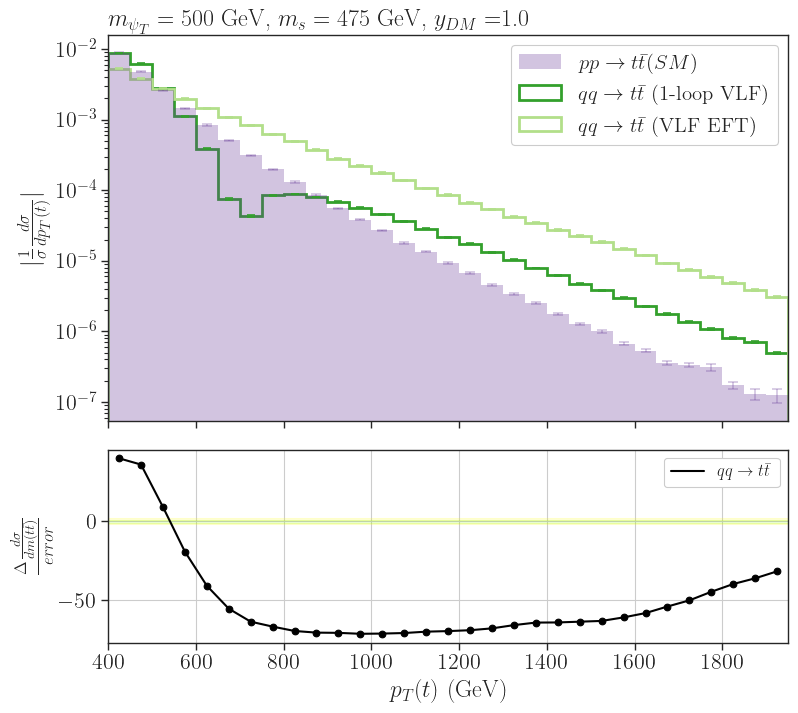

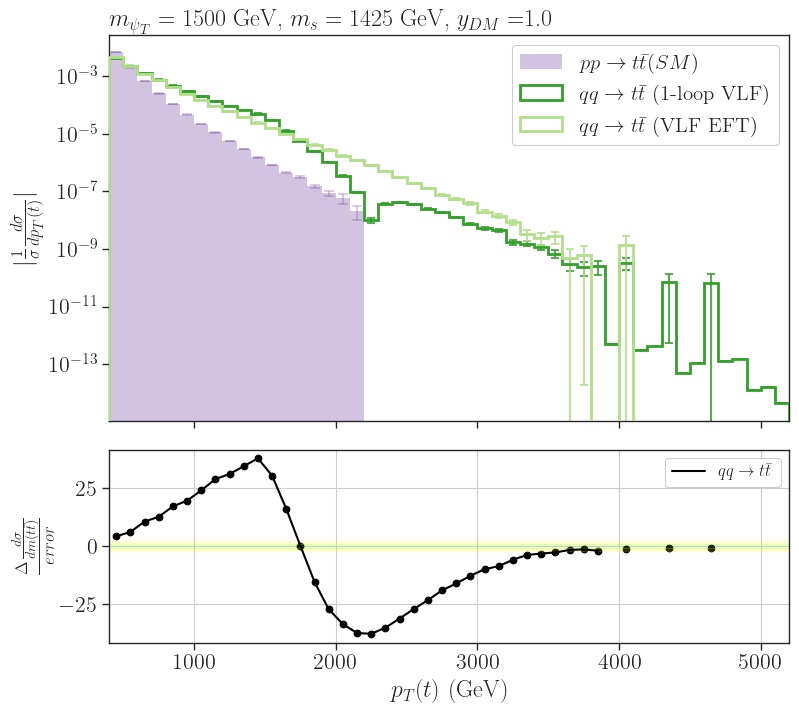

In [7]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False

#Defining the dist type
dist = 'pT1'

#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']

    #Couping
    yDM = selected[0]['ydm']
    
    #Defining the binning according to the BSM masses
    if mPsiT < 800.0:
        #bins = np.arange(400.,1550.,35.)
        bins = np.arange(400.,2000.,50.)
    elif mPsiT <= 1250:
        bins = np.arange(400.,2000.,50.)
    elif mPsiT <=2000:
        bins = np.arange(400.,5300.,100.)    
    elif mPsiT <=3000:
        bins = np.arange(400.,3300.,50.)
    elif mPsiT <= 7000:
        bins = np.arange(1000.,4300.,100.)
    else:
        bins = np.arange(1000.,5300.,100.)
   
    #SM plot arrays
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []

    #Selecting the SM data
    selected_sm = data_sm

    #Loop over qq and gg to generate pp
    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(d['pT'],bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['pT'],bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
        #Plotting the SM hist
        aux = axarr[0].hist(bins[:-1],weights=np.abs(h),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
                              color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                             linewidth=0,fill=True,stacked=True,linestyle='solid')
    
        #hists_sm.append(sum(hists_sm))
        #histsErr_sm.append(np.sqrt(histsErr_sm[0]**2 + histsErr_sm[1]**2))
        #Plotting the SM error
        x = (bins[:-1]+bins[1:])/2.0
        y = aux[0]
        #We have to propagate the error because we are using density = True
        yErr = abs(y)*np.sqrt((np.array(histsErr_sm[0])/np.array(hists_sm[0]))**2 + sum(np.power(histsErr_sm[0],2))/(sum(hists_sm[0])**2))  
        #Plot
        axarr[0].errorbar(x,y, yerr = yErr,
                       color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                          ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
    
    #BSM plot arrays
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    c = []

    #Loop over the processes
    for j,d in enumerate(selected):
        if r'$g g \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(d[dist],bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(d[dist],bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                              color=c[j],alpha=1.0,histtype='step', density = True,
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d p_T(t)}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    

    #Ratio plot
    
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[0]
    hLoop_Err = histsErr[0]
    hEFT = hists[1]
    hEFT_Err = histsErr[1]
    
    #Computing the ratio EFT/1-loop UV and its error
    labels_r = [r'$q q \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))

    #Computing the difference (1-Loop - EFT) and its error:
    diff = hLoop - hEFT
    diff_err = np.sqrt(np.array(hLoop_Err)**2 + np.array(hEFT_Err)**2)
    
    #Verifying the type of the subplot
    label = labels_r[0]
    #Ratio plot
    if ratio_plot == True:
        y = ratio
        y_err = ratio_Err
        y_label = r'$N_{EFT}/N_{1-loop}$'
        #axarr[1].plot(x, (1 - y)/y_err,linewidth=1.5,linestyle='solid',alpha=1,
                             #label=label,c=c[j]) 
        #axarr[1].scatter(x, (1 - y)/y_err ,color=c[j]) #Plot to see how many error bars the fraction is distance than one
        axarr[1].plot(x, y,linewidth=1.5,linestyle='solid',alpha=1,
                             label=label,c=c[j]) 
        axarr[1].errorbar(x,y, yerr = y_err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        axarr[1].set_ylim(-1.5,1.5)
        
        axarr[1].axhline(y=1, color='k', linestyle='--')
        #axarr[1].axhline(y=2, color='k', linestyle='--', alpha = 0.3)
        axarr[1].axhline(y=-1, color='k', linestyle='--')
        #axarr[1].axhline(y=-2, color='k', linestyle='--', alpha = 0.3)
        #axarr[1].set_ylim(2.5,1.5)
        
    #Diff over error plot
    else:
        y = np.array(diff)/np.array(diff_err)
        y_err = diff_err
        y_label = r'$\frac{\Delta \frac{d \sigma}{d m(t\bar{t})}}{error}$'
        #Plotting
        axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c='0')
        axarr[1].scatter(x,y,color='0')
        axarr[1].axhspan(-1,1, color = 'lawngreen', alpha = 0.15)
        axarr[1].axhspan(1,2, color = 'yellow', alpha = 0.15)
        axarr[1].axhspan(-1,-2, color = 'yellow', alpha = 0.15)

        
    
    
    
    #Subplot configs
    axarr[1].set_ylabel(y_label)
    #axarr[1].set_ylim(-1.5,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].set_xlabel(r'$p_T(t)$ (GeV)')
    axarr[1].legend(loc='upper right',fontsize=12,framealpha=1.0,ncol=2)
    
plt.show()

# Invariant mass $gg\to t\bar{t}$

/tmp/ipykernel_5418/44188011.py:71: RuntimeWarning: invalid value encountered in divide
  yErr = abs(y)*np.sqrt((np.array(histsErr_sm[0])/np.array(hists_sm[0]))**2 + sum(np.power(histsErr_sm[0],2))/(sum(hists_sm[0])**2))


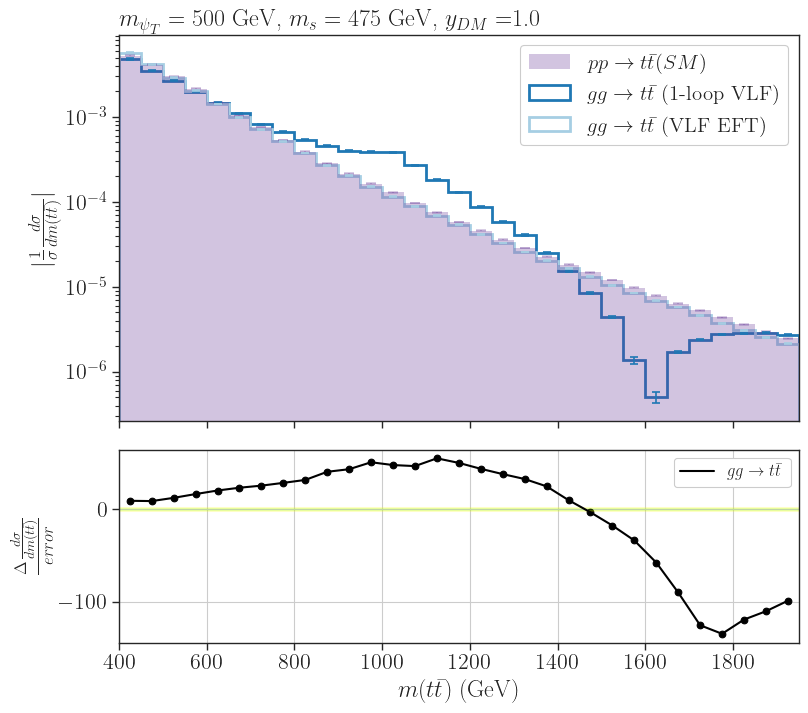

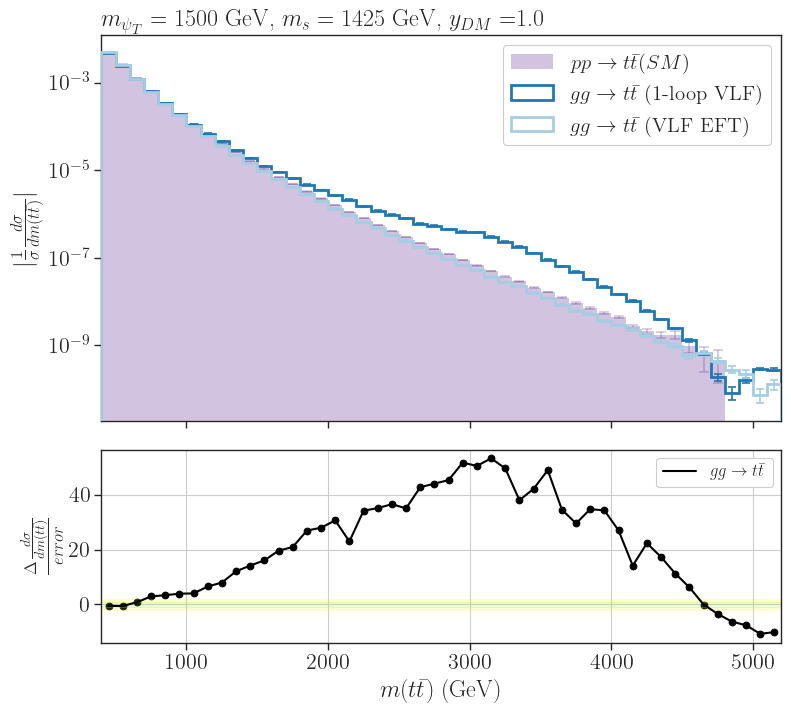

In [8]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']

    #Couping
    yDM = selected[0]['ydm']
    
    #Defining the binning according to the BSM masses
    if mPsiT < 800.0:
        #bins = np.arange(400.,1550.,35.)
        bins = np.arange(400.,2000.,50.)
    elif mPsiT <= 1250:
        bins = np.arange(400.,2000.,50.)
    elif mPsiT <=2000:
        bins = np.arange(400.,5300.,100.)    
    elif mPsiT <=3000:
        bins = np.arange(400.,3300.,50.)
    elif mPsiT <= 7000:
        bins = np.arange(1000.,4300.,100.)
    else:
        bins = np.arange(1000.,5300.,100.)
   
    #SM plot arrays
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []

    #Selecting the SM data
    selected_sm = data_sm

    #Loop over qq and gg to generate pp
    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
        #Plotting the SM hist
        aux = axarr[0].hist(bins[:-1],weights=np.abs(h),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
                              color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                             linewidth=0,fill=True,stacked=True,linestyle='solid')
    
        #hists_sm.append(sum(hists_sm))
        #histsErr_sm.append(np.sqrt(histsErr_sm[0]**2 + histsErr_sm[1]**2))
        #Plotting the SM error
        x = (bins[:-1]+bins[1:])/2.0
        y = aux[0]
        #We have to propagate the error because we are using density = True
        yErr = abs(y)*np.sqrt((np.array(histsErr_sm[0])/np.array(hists_sm[0]))**2 + sum(np.power(histsErr_sm[0],2))/(sum(hists_sm[0])**2))  
        #Plot
        axarr[0].errorbar(x,y, yerr = yErr,
                       color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                          ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)             
    
    #BSM plot arrays
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    c = []

    #Loop over the processes
    for j,d in enumerate(selected):
        if r'$q q \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                              color=c[j],alpha=1.0,histtype='step', density = True,
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            axarr[0].errorbar(x,aux[0], yerr = yErr , 
                              color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    

    #Ratio plot
    
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[0]
    hLoop_Err = histsErr[0]
    hEFT = hists[1]
    hEFT_Err = histsErr[1]
    
    #Computing the ratio EFT/1-loop UV and its error
    labels_r = [r'$g g \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))

    #Computing the difference (1-Loop - EFT) and its error:
    diff = hLoop - hEFT
    diff_err = np.sqrt(np.array(hLoop_Err)**2 + np.array(hEFT_Err)**2)
    
    #Verifying the type of the subplot
    label = labels_r[0]
    #Ratio plot
    if ratio_plot == True:
        y = ratio
        y_err = ratio_Err
        y_label = r'$N_{EFT}/N_{1-loop}$'
        #axarr[1].plot(x, (1 - y)/y_err,linewidth=1.5,linestyle='solid',alpha=1,
                             #label=label,c=c[j]) 
        #axarr[1].scatter(x, (1 - y)/y_err ,color=c[j]) #Plot to see how many error bars the fraction is distance than one
        axarr[1].plot(x, y,linewidth=1.5,linestyle='solid',alpha=1,
                             label=label,c=c[j]) 
        axarr[1].errorbar(x,y, yerr = y_err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        axarr[1].set_ylim(-1.5,1.5)
        
        axarr[1].axhline(y=1, color='k', linestyle='--')
        #axarr[1].axhline(y=2, color='k', linestyle='--', alpha = 0.3)
        axarr[1].axhline(y=-1, color='k', linestyle='--')
        #axarr[1].axhline(y=-2, color='k', linestyle='--', alpha = 0.3)
        #axarr[1].set_ylim(2.5,1.5)
        
    #Diff over error plot
    else:
        y = np.array(diff)/np.array(diff_err)
        y_err = diff_err
        y_label = r'$\frac{\Delta \frac{d \sigma}{d m(t\bar{t})}}{error}$'
        #Plotting
        axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c='0')
        axarr[1].scatter(x,y,color='0')
        axarr[1].axhspan(-1,1, color = 'lawngreen', alpha = 0.15)
        axarr[1].axhspan(1,2, color = 'yellow', alpha = 0.15)
        axarr[1].axhspan(-1,-2, color = 'yellow', alpha = 0.15)

        
    
    
    
    #Subplot configs
    axarr[1].set_ylabel(y_label)
    #axarr[1].set_ylim(-1.5,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].set_xlabel(r'$m(t\bar{t})$ (GeV)')
    axarr[1].legend(loc='upper right',fontsize=12,framealpha=1.0,ncol=2)
    
plt.show()

# $p_T$ $gg\to t\bar{t}$

IndexError: list index out of range

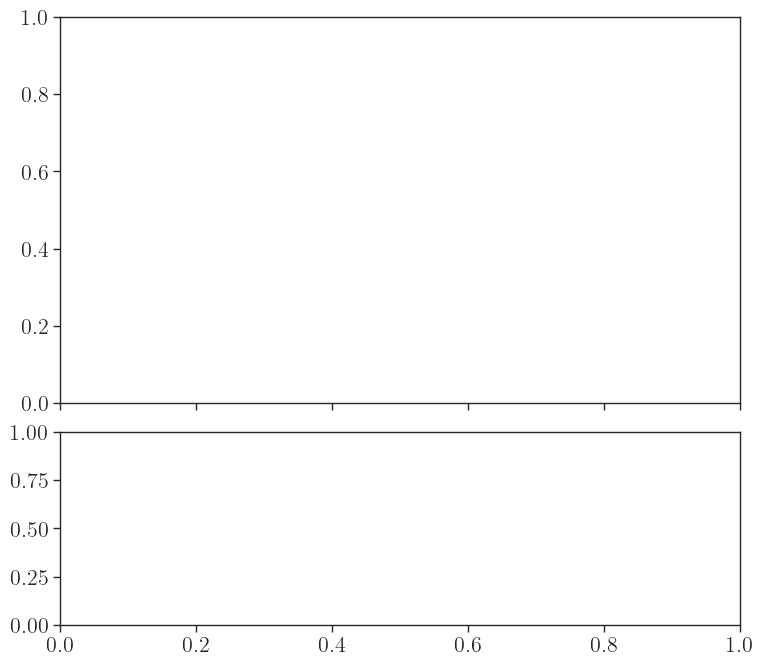

In [9]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False

#Defining the dist type
dist = 'pT'

#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']

    #Couping
    yDM = selected[0]['ydm']
    
    #Defining the binning according to the BSM masses
    if mPsiT < 800.0:
        bins = np.arange(400.,2000.,50.)
    elif mPsiT <= 1250:
        bins = np.arange(400.,2000.,50.)
    elif mPsiT <=2000:
        bins = np.arange(400.,3300.,50.)    
    elif mPsiT <=3000:
        bins = np.arange(400.,3300.,100.)
    elif mPsiT <= 7000:
        bins = np.arange(1000.,4300.,100.)
    else:
        bins = np.arange(1000.,5300.,100.)
   
    #SM plot arrays
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []

    #Selecting the SM according to the bias
    if mPsiT > 1500.:
        selected_sm = data_sm[-1]
    else:
        selected_sm = data_sm[-2]

    #Loop over qq and gg to generate pp
    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(d[dist],bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d[dist],bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
    #Plotting the SM hist
    aux = axarr[0].hist(bins[:-1],weights=np.abs(sum(hists_sm)),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
                          color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                         linewidth=0,fill=True,stacked=True,linestyle='solid')
    hists_sm.append(sum(hists_sm))
    histsErr_sm.append(np.sqrt(histsErr_sm[0]**2 + histsErr_sm[1]**2))
    #Plotting the SM error
    x = (bins[:-1]+bins[1:])/2.0
    y = aux[0]
    #We have to propagate the error because we are using density = True
    yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))  
    #Plot
    axarr[0].errorbar(x,y, yerr = yErr,
                    color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                      ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
    
    #BSM plot arrays
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    c = []

    #Loop over the processes
    for j,d in enumerate(selected):
        if r'$q q \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(d[dist],bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(d[dist],bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                              color=c[j],alpha=1.0,histtype='step', density = True,
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d p_T(t)}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    

    #Ratio plot
    
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[1]
    hLoop_Err = histsErr[1]
    hEFT = hists[0]
    hEFT_Err = histsErr[0]
    
    #Computing the ratio EFT/1-loop UV and its error
    labels_r = [r'$g g \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))

    #Computing the difference (1-Loop - EFT) and its error:
    diff = hLoop - hEFT
    diff_err = np.sqrt(np.array(hLoop_Err)**2 + np.array(hEFT_Err)**2)
    
    #Verifying the type of the subplot
    label = labels_r[0]
    #Ratio plot
    if ratio_plot == True:
        y = ratio
        y_err = ratio_Err
        y_label = r'$N_{EFT}/N_{1-loop}$'
        #axarr[1].plot(x, (1 - y)/y_err,linewidth=1.5,linestyle='solid',alpha=1,
                             #label=label,c=c[j]) 
        #axarr[1].scatter(x, (1 - y)/y_err ,color=c[j]) #Plot to see how many error bars the fraction is distance than one
        axarr[1].plot(x, y,linewidth=1.5,linestyle='solid',alpha=1,
                             label=label,c=c[j]) 
        axarr[1].errorbar(x,y, yerr = y_err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        axarr[1].set_ylim(-1.5,1.5)
        
        axarr[1].axhline(y=1, color='k', linestyle='--')
        #axarr[1].axhline(y=2, color='k', linestyle='--', alpha = 0.3)
        axarr[1].axhline(y=-1, color='k', linestyle='--')
        #axarr[1].axhline(y=-2, color='k', linestyle='--', alpha = 0.3)
        #axarr[1].set_ylim(2.5,1.5)
        
    #Diff over error plot
    else:
        y = np.array(diff)/np.array(diff_err)
        y_err = diff_err
        y_label = r'$\frac{\Delta \frac{d \sigma}{d m(t\bar{t})}}{error}$'
        #Plotting
        axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c='0')
        axarr[1].scatter(x,y,color='0')
        axarr[1].axhspan(-1,1, color = 'lawngreen', alpha = 0.15)
        axarr[1].axhspan(1,2, color = 'yellow', alpha = 0.15)
        axarr[1].axhspan(-1,-2, color = 'yellow', alpha = 0.15)

        
    
    
    
    #Subplot configs
    axarr[1].set_ylabel(y_label)
    #axarr[1].set_ylim(-1.5,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].set_xlabel(r'$p_T(t)$ (GeV)')
    axarr[1].legend(loc='upper right',fontsize=12,framealpha=1.0,ncol=2)
    
plt.show()

# Combined plot $pp\to t\bar{t}$

[NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/UV_BSM/gg2ttbar_gs4_ydm2/run_exp/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/UV_BSM/qq2ttbar_gs4_ydm2/run_exp/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/TopEFT/gg2ttbar_gs4_ydm2/run_exp/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/TopEFT/qq2ttbar_gs4_ydm2/run_exp/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights...]
1-loop VLF 1-loop VLF
VLF EFT VLF EFT
[NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/UV_BSM/gg2ttbar_gs4_ydm2/run_exp/mPsiT_1500_mSDM_1425.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/UV_BSM/

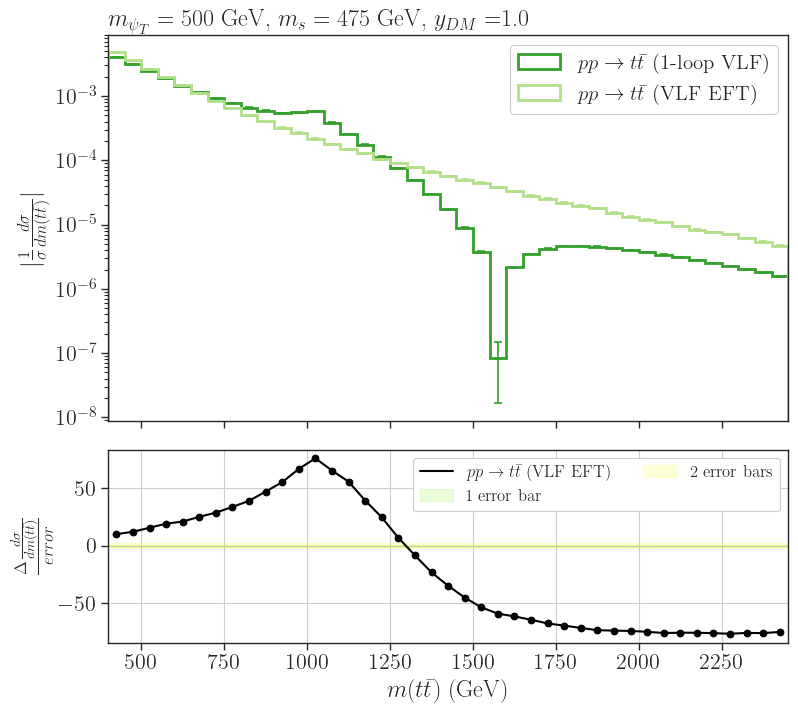

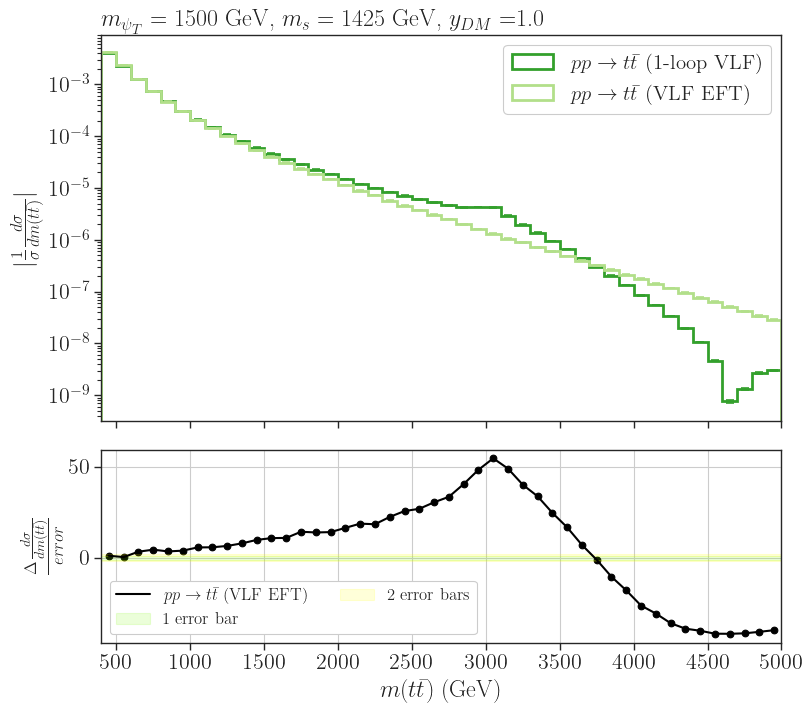

In [14]:
# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']

    #Couping
    yDM = selected[0]['ydm']
    
    #Defining the binning according to the BSM masses
    # Defining the binning
    bins = np.arange(400., 3000., 50.)
    if mPsiT < 600:
        bins = np.arange(400., 2500., 50.)
    elif mPsiT < 1000:
        bins = np.arange(400., 4000., 75.)
    else:
        bins = np.arange(400., 5050., 100.)
   
    #SM plot arrays
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []

    #Selecting the SM
    selected_sm = data_sm

    #Loop over qq and gg to generate pp
    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
    #Plotting the SM hist
        #aux = axarr[0].hist(bins[:-1],weights=np.abs(h),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
         #                 color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
          #               linewidth=0,fill=True,stacked=True,linestyle='solid')
         #Plotting the SM error
        x = (bins[:-1]+bins[1:])/2.0
        #y = aux[0]
        #We have to propagate the error because we are using density = True
        #yErr = abs(y)*np.sqrt((np.array(histsErr_sm[0])/np.array(hists_sm[0]))**2 + sum(np.power(histsErr_sm[0],2))/(sum(hists_sm[0])**2))  
        #Plot
        #axarr[0].errorbar(x,y, yerr = yErr,
         #               color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
          #                ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
        
    #BSM plot arrays
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    c = []

   # Loop over the processes and models
    d = selected
    print(d)
    for j in range(0,len(d),2):
        print(d[j]['model'], d[j+1]['model'])
        process = r'$p p \to t \bar{t}$'
        model = d[j]['model']
        weights = d[j]['weights']
        label = f"{process} ({model})"
        labels.append(label)
        color = selectColor(model, process)
        c.append(color)
        
        h1, _ = np.histogram(d[j]['mTT'], bins=bins, weights=d[j]['weights'])
        hErr1, _ = np.histogram(d[j]['mTT'], bins=bins, weights=(d[j]['weights'])**2)
        hErr1 = np.sqrt(hErr1)

        h2, _ = np.histogram(d[j+1]['mTT'], bins=bins, weights=d[j+1]['weights'])
        hErr2, _ = np.histogram(d[j+1]['mTT'], bins=bins, weights=(d[j+1]['weights'])**2)
        hErr2 = np.sqrt(hErr2)
        
        h = sum([h1,h2])
        hists.append(h)
        hErr = np.sqrt(hErr1**2 + hErr2**2)
        histsErr.append(hErr)
        # Plotting the BSM hists
        aux = axarr[0].hist(bins[:-1], weights=abs(h), label=label, bins=bins,
                      color=color, alpha=1.0, histtype='step', density = True,
                      linewidth=2, fill=False, zorder=j)
        
        # Plotting the errors
        x = (bins[:-1] + bins[1:]) / 2.0
        y = aux[0]
        # Propagating the error
        yErr = abs(y) * np.sqrt((hErr/h)**2 + np.sum(hErr**2) / (np.sum(h)**2))
        axarr[0].errorbar(x, y, yerr=yErr,
                    color=color, fmt='none', capsize=3, capthick=1.2, barsabove=True)
           
    

    #Ratio plot

    x = (bins[:-1] + bins[1:]) / 2.0
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[0]
    hLoop_Err = histsErr[0]
    hEFT = hists[1]
    hEFT_Err = histsErr[1]
    
    if ratio_plot == True:
        # Calculate the ratio BSM / SM
        ratio = np.divide(hists, hists_sm, out=np.ones_like(hists), where=hists_sm!=0)
        
        # Propagate the errors for the ratio
        # Using np.where to avoid division by zero
        err_bsm_sq =  (np.array(histsErr)/np.array(hists))**2
        err_sm_sq =  (np.array(histsErr_sm)/np.array(hists_sm))**2
        ratio_err = np.abs(ratio) * np.sqrt(err_bsm_sq + err_sm_sq)
        # Plot the ratio with its error on the bottom plot
        for k,r in enumerate(ratio):
            axarr[1].errorbar(x, r, yerr=ratio_err[k], color=c[k], fmt='o', ms=3, capsize=3.5, label = labels[k])
            axarr[1].plot(x, r, color=c[k]) # Add a line connecting points
        # --- Ratio plot configs ---
        #axarr[1].axhline(y=1, color='k', linestyle='--')
        axarr[1].legend(framealpha=1.0,ncol = 2, loc='upper left',fontsize=10)
        axarr[1].set_ylabel(r'$N_{BSM} / N_{SM}$')
        axarr[1].set_xlabel(r'$m(t\bar{t})$ (GeV)')
        axarr[1].grid(True)
        #axarr[1].set_ylim(0.5, 1.5) # Set a reasonable y-range for the ratio
    else:
        #Computing the difference (1-Loop - EFT) and its error:
        diff = hLoop - hEFT
        diff_err = np.sqrt(np.array(hLoop_Err)**2 + np.array(hEFT_Err)**2)
        y = np.array(diff)/np.array(diff_err)
        y_err = diff_err
        y_label = r'$\frac{\Delta \frac{d \sigma}{d m(t\bar{t})}}{error}$'
        #Plotting
        axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c='0')
        axarr[1].scatter(x,y,color='0')
        axarr[1].axhspan(-1,1, color = 'lawngreen', alpha = 0.15, label = ' 1 error bar')
        axarr[1].axhspan(1,2, color = 'yellow', alpha = 0.15, label = ' 2 error bars')
        axarr[1].axhspan(-1,-2, color = 'yellow', alpha = 0.15)
        axarr[1].set_ylabel(y_label)
        axarr[1].grid()
        axarr[1].set_xlabel(r'$m(t\bar{t})$ (GeV)')
        if mPsiT == 1500.0:
            axarr[1].set_xticks(np.arange(500, 5500, 500))
        axarr[1].legend(fontsize=12,framealpha=1.0,ncol=2)
        

    # --- Main plot configs ---
    #Main plot configs
    axarr[0].legend(framealpha=1.0, ncol = 1, loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)


    

plt.show()


[NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/UV_BSM/gg2ttbar_gs4_ydm2/run_exp/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/UV_BSM/qq2ttbar_gs4_ydm2/run_exp/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/TopEFT/gg2ttbar_gs4_ydm2/run_exp/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/TopEFT/qq2ttbar_gs4_ydm2/run_exp/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights...]
1-loop VLF 1-loop VLF
VLF EFT VLF EFT
[NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/UV_BSM/gg2ttbar_gs4_ydm2/run_exp/mPsiT_1500_mSDM_1425.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/UV_BSM/

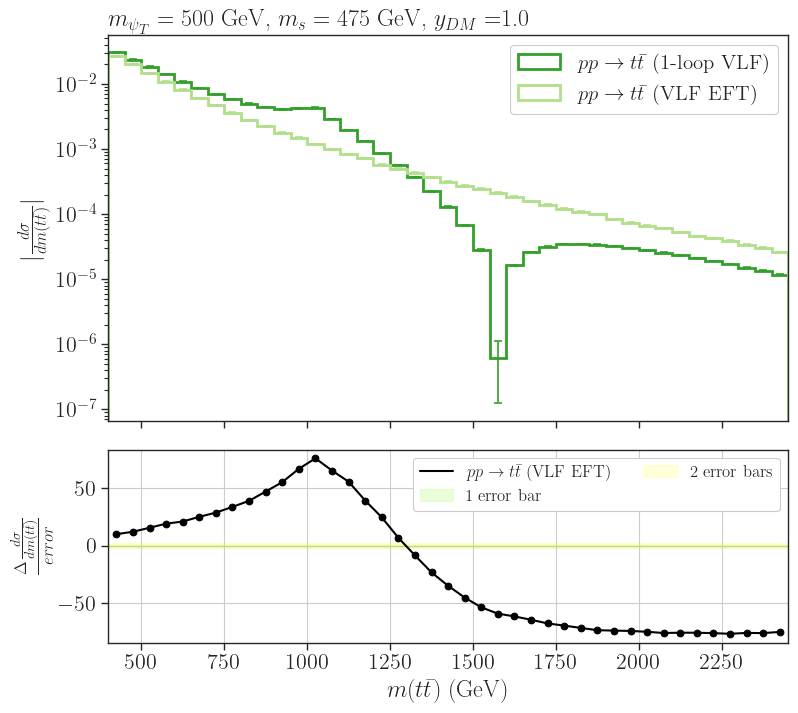

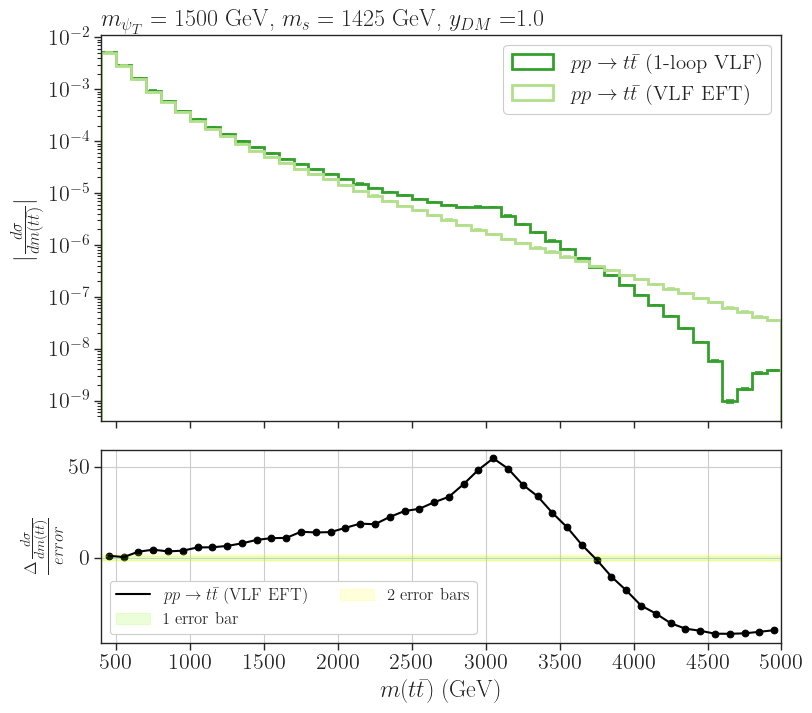

In [15]:
# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']

    #Couping
    yDM = selected[0]['ydm']
    
    #Defining the binning according to the BSM masses
    # Defining the binning
    bins = np.arange(400., 3000., 50.)
    if mPsiT < 600:
        bins = np.arange(400., 2500., 50.)
    elif mPsiT < 1000:
        bins = np.arange(400., 4000., 75.)
    else:
        bins = np.arange(400., 5050., 100.)
   
    #SM plot arrays
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []

    #Selecting the SM
    selected_sm = data_sm

    #Loop over qq and gg to generate pp
    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
    #Plotting the SM hist
        #aux = axarr[0].hist(bins[:-1],weights=np.abs(h),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
         #                 color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
          #               linewidth=0,fill=True,stacked=True,linestyle='solid')
         #Plotting the SM error
        x = (bins[:-1]+bins[1:])/2.0
        #y = aux[0]
        #We have to propagate the error because we are using density = True
        #yErr = abs(y)*np.sqrt((np.array(histsErr_sm[0])/np.array(hists_sm[0]))**2 + sum(np.power(histsErr_sm[0],2))/(sum(hists_sm[0])**2))  
        #Plot
        #axarr[0].errorbar(x,y, yerr = yErr,
         #               color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
          #                ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
        
    #BSM plot arrays
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    c = []

   # Loop over the processes and models
    d = selected
    print(d)
    for j in range(0,len(d),2):
        print(d[j]['model'], d[j+1]['model'])
        process = r'$p p \to t \bar{t}$'
        model = d[j]['model']
        weights = d[j]['weights']
        label = f"{process} ({model})"
        labels.append(label)
        color = selectColor(model, process)
        c.append(color)
        
        h1, _ = np.histogram(d[j]['mTT'], bins=bins, weights=d[j]['weights'])
        hErr1, _ = np.histogram(d[j]['mTT'], bins=bins, weights=(d[j]['weights'])**2)
        hErr1 = np.sqrt(hErr1)

        h2, _ = np.histogram(d[j+1]['mTT'], bins=bins, weights=d[j+1]['weights'])
        hErr2, _ = np.histogram(d[j+1]['mTT'], bins=bins, weights=(d[j+1]['weights'])**2)
        hErr2 = np.sqrt(hErr2)
        
        h = sum([h1,h2])
        hists.append(h)
        hErr = np.sqrt(hErr1**2 + hErr2**2)
        histsErr.append(hErr)
        # Plotting the BSM hists
        aux = axarr[0].hist(bins[:-1], weights=abs(h), label=label, bins=bins,
                      color=color, alpha=1.0, histtype='step',
                      linewidth=2, fill=False, zorder=j)
        
        # Plotting the errors
        x = (bins[:-1] + bins[1:]) / 2.0
        y = aux[0]
        # Propagating the error
        yErr = hErr
        axarr[0].errorbar(x, y, yerr=yErr,
                    color=color, fmt='none', capsize=3, capthick=1.2, barsabove=True)
           
    

    #Ratio plot

    x = (bins[:-1] + bins[1:]) / 2.0
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[0]
    hLoop_Err = histsErr[0]
    hEFT = hists[1]
    hEFT_Err = histsErr[1]
    
    if ratio_plot == True:
        # Calculate the ratio BSM / SM
        ratio = np.divide(hists, hists_sm, out=np.ones_like(hists), where=hists_sm!=0)
        
        # Propagate the errors for the ratio
        # Using np.where to avoid division by zero
        err_bsm_sq =  (np.array(histsErr)/np.array(hists))**2
        err_sm_sq =  (np.array(histsErr_sm)/np.array(hists_sm))**2
        ratio_err = np.abs(ratio) * np.sqrt(err_bsm_sq + err_sm_sq)
        # Plot the ratio with its error on the bottom plot
        for k,r in enumerate(ratio):
            axarr[1].errorbar(x, r, yerr=ratio_err[k], color=c[k], fmt='o', ms=3, capsize=3.5, label = labels[k])
            axarr[1].plot(x, r, color=c[k]) # Add a line connecting points
        # --- Ratio plot configs ---
        #axarr[1].axhline(y=1, color='k', linestyle='--')
        axarr[1].legend(framealpha=1.0,ncol = 2, loc='upper left',fontsize=10)
        axarr[1].set_ylabel(r'$N_{BSM} / N_{SM}$')
        axarr[1].set_xlabel(r'$m(t\bar{t})$ (GeV)')
        axarr[1].grid(True)
        #axarr[1].set_ylim(0.5, 1.5) # Set a reasonable y-range for the ratio
    else:
        #Computing the difference (1-Loop - EFT) and its error:
        diff = hLoop - hEFT
        diff_err = np.sqrt(np.array(hLoop_Err)**2 + np.array(hEFT_Err)**2)
        y = np.array(diff)/np.array(diff_err)
        y_err = diff_err
        y_label = r'$\frac{\Delta \frac{d \sigma}{d m(t\bar{t})}}{error}$'
        #Plotting
        axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c='0')
        axarr[1].scatter(x,y,color='0')
        axarr[1].axhspan(-1,1, color = 'lawngreen', alpha = 0.15, label = ' 1 error bar')
        axarr[1].axhspan(1,2, color = 'yellow', alpha = 0.15, label = ' 2 error bars')
        axarr[1].axhspan(-1,-2, color = 'yellow', alpha = 0.15)
        axarr[1].set_ylabel(y_label)
        axarr[1].grid()
        axarr[1].set_xlabel(r'$m(t\bar{t})$ (GeV)')
        if mPsiT == 1500.0:
            axarr[1].set_xticks(np.arange(500, 5500, 500))
        axarr[1].legend(fontsize=12,framealpha=1.0,ncol=2)
        

    # --- Main plot configs ---
    #Main plot configs
    axarr[0].legend(framealpha=1.0, ncol = 1, loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{d \sigma}{d m(t\bar{t})}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)


    

plt.show()
